In [1]:
!pip install --upgrade tensorflow

In [2]:
!pip install scikeras

In [3]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import RNN, Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv(r"C:\Users\86130\00.Project\03.Datasets\Merged_SectorType1209.csv")

In [5]:
data.head()

,Unnamed: 0,SectorType,AvgMaxPower,AvgMinPower,date,max temperature,min temperature
0,0,Large industrial electricity,117888.3300,51526.5690,1/1/2019,12.0,7.0
1,1,business electricity,64027.8582,23758.7970,1/1/2019,12.0,7.0
2,2,general industry,6179.9364,4093.0467,1/1/2019,12.0,7.0
3,3,general industry,10711.9704,3971.5308,1/2/2019,11.0,6.0
4,4,business electricity,75467.2143,20231.6265,1/2/2019,11.0,6.0


In [6]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
data.head()

,SectorType,AvgMaxPower,AvgMinPower,date,max temperature,min temperature
0,Large industrial electricity,117888.3300,51526.5690,1/1/2019,12.0,7.0
1,business electricity,64027.8582,23758.7970,1/1/2019,12.0,7.0
2,general industry,6179.9364,4093.0467,1/1/2019,12.0,7.0
3,general industry,10711.9704,3971.5308,1/2/2019,11.0,6.0
4,business electricity,75467.2143,20231.6265,1/2/2019,11.0,6.0


In [8]:
from sklearn.preprocessing import LabelEncoder

# Create one LabelEncoder
label_encoder = LabelEncoder()

# Label-encode the columns that need to be encoded
columns_to_label_encode = ['SectorType']
for col in columns_to_label_encode:
    data[col + '_encoded'] = label_encoder.fit_transform(data[col])

# Print the modified DataFrame
print(data)

                        SectorType  AvgMaxPower  AvgMinPower       date  \
0     Large industrial electricity  117888.3300   51526.5690   1/1/2019   
1             business electricity   64027.8582   23758.7970   1/1/2019   
2                 general industry    6179.9364    4093.0467   1/1/2019   
3                 general industry   10711.9704    3971.5308   1/2/2019   
4             business electricity   75467.2143   20231.6265   1/2/2019   
...                            ...          ...          ...        ...   
3605          non-general industry    3316.1904    1434.9684  8/30/2021   
3606  Large industrial electricity  101834.8440   74755.6662  8/31/2021   
3607          non-general industry    3223.6920    1401.9822  8/31/2021   
3608          business electricity   96396.2568   21291.3042  8/31/2021   
3609              general industry   10329.5676    3732.4056  8/31/2021   

      max temperature  min temperature  SectorType_encoded  
0                12.0              7.0

In [9]:
data.head()

,SectorType,AvgMaxPower,AvgMinPower,date,max temperature,min temperature,SectorType_encoded
0,Large industrial electricity,117888.3300,51526.5690,1/1/2019,12.0,7.0,0
1,business electricity,64027.8582,23758.7970,1/1/2019,12.0,7.0,1
2,general industry,6179.9364,4093.0467,1/1/2019,12.0,7.0,2
3,general industry,10711.9704,3971.5308,1/2/2019,11.0,6.0,2
4,business electricity,75467.2143,20231.6265,1/2/2019,11.0,6.0,1


In [9]:
data = data[data['SectorType'] == 'Large industrial electricity']
data.head()

,SectorType,AvgMaxPower,AvgMinPower,date,max temperature,min temperature,SectorType_encoded
0,Large industrial electricity,117888.3300,51526.5690,1/1/2019,12.0,7.0,0
5,Large industrial electricity,126843.7914,63638.4294,1/2/2019,11.0,6.0,0
7,Large industrial electricity,130286.1294,102048.2754,1/3/2019,15.0,9.0,0
11,Large industrial electricity,133018.6344,104466.0762,1/4/2019,17.0,12.0,0
12,Large industrial electricity,133504.4784,99507.3528,1/5/2019,17.0,12.0,0


In [10]:
data['date'] = pd.to_datetime(data['date'])

In [11]:
features = data[['AvgMinPower','SectorType_encoded','max temperature', 'min temperature' ]].values
targets = data[['AvgMaxPower']].values

In [12]:
scaler_features = MinMaxScaler()
scaler_targets = MinMaxScaler()
features_scaled = scaler_features.fit_transform(features)
targets_scaled = scaler_targets.fit_transform(targets)

In [13]:
# 创建时间序列数据
def create_sequences(input_data, output_data, time_steps):
    X, y = [], []
    for i in range(len(input_data) - time_steps):
        X.append(input_data[i:(i + time_steps)])
        y.append(output_data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 10
X, y = create_sequences(features_scaled, targets_scaled, time_steps)

In [14]:
from sklearn.model_selection import train_test_split

# 假设 X 是您的特征数据，y 是您的目标数据# 创建时间序列数据
def create_sequences(input_data, output_data, time_steps):
    X, y = [], []
    for i in range(len(input_data) - time_steps):
        X.append(input_data[i:(i + time_steps)])
        y.append(output_data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 10
X, y = create_sequences(features_scaled, targets_scaled, time_steps)
# X 和 y 需要是 NumPy 数组或类似数组的结构

# 设置划分比例，例如，80% 训练数据和 20% 测试数据
test_size = 0.25

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# 输出划分结果
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (722, 10, 4)
Test set size: (241, 10, 4)


In [15]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

def create_rnn_model(units, optimizer):
    model = Sequential()
    model.add(SimpleRNN(units=units, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

In [16]:
from scikeras.wrappers import KerasRegressor

model = KerasRegressor(build_fn=create_rnn_model, verbose=1)

In [17]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'model__units': [20, 50, 100],
    'model__optimizer': ['adam'],
    'batch_size': [16, 32],
    'epochs': [10, 20]
}

# 创建 GridSearchCV 对象
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=1)

# 进行网格搜索
grid_result = grid.fit(X, y)

# 打印最佳参数和最佳分数
print("Best Parameters:", grid_result.best_params_)
print("Best Score:", grid_result.best_score_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


Epoch 1/10

150/150 [==============================] - 1s 2ms/step - loss: 0.0529
Epoch 2/10
150/150 [==============================] - 0s 2ms/step - loss: 0.0391
Epoch 3/10
150/150 [==============================] - 0s 2ms/step - loss: 0.0369
Epoch 4/10
150/150 [==============================] - 0s 2ms/step - loss: 0.0362
Epoch 5/10
150/150 [==============================] - 0s 2ms/step - loss: 0.0354
Epoch 6/10
150/150 [==============================] - 0s 2ms/step - loss: 0.0350
Epoch 7/10
150/150 [==============================] - 0s 2ms/step - loss: 0.0346
Epoch 8/10
150/150 [==============================] - 0s 2ms/step - loss: 0.0338
Epoch 9/10
150/150 [==============================] - 0s 2ms/step - loss: 0.0337
Epoch 10/10
75/75 [==============================] - 0s 1ms/step
Epoch 1/10
150/150 [==============================] - 1s 2ms/step - loss: 0.0791
Epoch 2/10
150/150 [==============================] - 0s 2ms/

150/150 [==============================] - 0s 2ms/step - loss: 0.0551
Epoch 16/20
150/150 [==============================] - 0s 2ms/step - loss: 0.0544
Epoch 17/20
150/150 [==============================] - 0s 2ms/step - loss: 0.0544
Epoch 18/20
150/150 [==============================] - 0s 2ms/step - loss: 0.0548
Epoch 19/20
150/150 [==============================] - 0s 2ms/step - loss: 0.0548
Epoch 20/20
75/75 [==============================] - 0s 1ms/step
Epoch 1/20
150/150 [==============================] - 1s 2ms/step - loss: 0.0856
Epoch 2/20
150/150 [==============================] - 0s 2ms/step - loss: 0.0605
Epoch 3/20
150/150 [==============================] - 0s 2ms/step - loss: 0.0605
Epoch 4/20
150/150 [==============================] - 0s 2ms/step - loss: 0.0601
Epoch 5/20
150/150 [==============================] - 0s 2ms/step - loss: 0.0593
Epoch 6/20
150/150 [==============================] - 0s 2ms/step - loss: 0.0583
Epoch 7/20
150/150 [==============================]

75/75 [==============================] - 0s 2ms/step - loss: 0.0817
Epoch 3/10
75/75 [==============================] - 0s 2ms/step - loss: 0.0697
Epoch 4/10
75/75 [==============================] - 0s 2ms/step - loss: 0.0655
Epoch 5/10
75/75 [==============================] - 0s 2ms/step - loss: 0.0638
Epoch 6/10
75/75 [==============================] - 0s 2ms/step - loss: 0.0637
Epoch 7/10
75/75 [==============================] - 0s 2ms/step - loss: 0.0629
Epoch 8/10
75/75 [==============================] - 0s 2ms/step - loss: 0.0633
Epoch 9/10
75/75 [==============================] - 0s 2ms/step - loss: 0.0626
Epoch 10/10
38/38 [==============================] - 0s 1ms/step
Epoch 1/10
75/75 [==============================] - 1s 2ms/step - loss: 0.0879
Epoch 2/10
75/75 [==============================] - 0s 2ms/step - loss: 0.0642
Epoch 3/10
75/75 [==============================] - 0s 2ms/step - loss: 0.0622
Epoch 4/10
75/75 [==============================] - 0s 2ms/step - loss: 0.061

75/75 [==============================] - 0s 2ms/step - loss: 0.0553
Epoch 20/20
38/38 [==============================] - 0s 2ms/step
Epoch 1/20
75/75 [==============================] - 1s 3ms/step - loss: 0.1155
Epoch 2/20
75/75 [==============================] - 0s 3ms/step - loss: 0.0381
Epoch 3/20
75/75 [==============================] - 0s 3ms/step - loss: 0.0364
Epoch 4/20
75/75 [==============================] - 0s 3ms/step - loss: 0.0351
Epoch 5/20
75/75 [==============================] - 0s 3ms/step - loss: 0.0367
Epoch 6/20
75/75 [==============================] - 0s 3ms/step - loss: 0.0360
Epoch 7/20
75/75 [==============================] - 0s 3ms/step - loss: 0.0366
Epoch 8/20
75/75 [==============================] - 0s 3ms/step - loss: 0.0339
Epoch 9/20
75/75 [==============================] - 0s 3ms/step - loss: 0.0333
Epoch 10/20
75/75 [==============================] - 0s 3ms/step - loss: 0.0338
Epoch 11/20
75/75 [==============================] - 0s 3ms/step - loss: 0.0

In [21]:
from tensorflow.keras.layers import SimpleRNN, Dense
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# RNN 模型构建函数
#def create_rnn_model(units=50, optimizer='adam'):
  #  model = Sequential()
   # model.add(SimpleRNN(units=units, input_shape=(X.shape[1], 4)))
   # model.add(Dense(1))  # 输出层有两个神经元，一个用于最大平均电力负荷，另一个用于最小平均电力负荷
   # model.compile(optimizer=optimizer, loss='mean_squared_error')
  #  return model

#创建 KerasRegressor 包装器
#model = KerasRegressor(model=create_rnn_model, verbose=0)

# 定义网格搜索参数
param_grid = {
    'model__units': [20, 50, 100],
    'model__optimizer': ['adam', 'rmsprop'],
    'batch_size': [16, 32],
    'epochs': [10, 20]
}

# 创建 GridSearchCV 对象
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=1)

# 进行网格搜索
grid_result = grid.fit(X, y)

# 打印最佳参数和最佳分数
print("Best Parameters:", grid_result.best_params_)
print("Best Score:", grid_result.best_score_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


ValueError: 
All the 72 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\86130\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\86130\anaconda3\lib\site-packages\scikeras\wrappers.py", line 760, in fit
    self._fit(
  File "C:\Users\86130\anaconda3\lib\site-packages\scikeras\wrappers.py", line 915, in _fit
    X, y = self._initialize(X, y)
  File "C:\Users\86130\anaconda3\lib\site-packages\scikeras\wrappers.py", line 852, in _initialize
    self.model_ = self._build_keras_model()
  File "C:\Users\86130\anaconda3\lib\site-packages\scikeras\wrappers.py", line 429, in _build_keras_model
    model = final_build_fn(**build_params)
TypeError: create_rnn_model() got an unexpected keyword argument 'optimizer'


In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 构建 RNN 模型
model = Sequential()
model.add(SimpleRNN(units=20, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))  # 假设我们有两个输出
model.compile(optimizer='rmsprop', loss='mean_squared_error')

In [32]:
# 训练模型
history = model.fit(X_train, y_train, epochs=40, batch_size=35,verbose=1, validation_split=0.1)

Epoch 1/40
19/19 [==============================] - 0s 7ms/step - loss: 0.0057 - val_loss: 0.0053
Epoch 2/40
19/19 [==============================] - 0s 4ms/step - loss: 0.0051 - val_loss: 0.0055
Epoch 3/40
19/19 [==============================] - 0s 4ms/step - loss: 0.0051 - val_loss: 0.0068
Epoch 4/40
19/19 [==============================] - 0s 4ms/step - loss: 0.0052 - val_loss: 0.0056
Epoch 5/40
19/19 [==============================] - 0s 4ms/step - loss: 0.0051 - val_loss: 0.0095
Epoch 6/40
19/19 [==============================] - 0s 4ms/step - loss: 0.0057 - val_loss: 0.0052
Epoch 7/40
19/19 [==============================] - 0s 4ms/step - loss: 0.0051 - val_loss: 0.0056
Epoch 8/40
19/19 [==============================] - 0s 4ms/step - loss: 0.0053 - val_loss: 0.0050
Epoch 9/40
19/19 [==============================] - 0s 4ms/step - loss: 0.0055 - val_loss: 0.0049
Epoch 10/40
19/19 [==============================] - 0s 4ms/step - loss: 0.0050 - val_loss: 0.0056
Epoch 11/40
19/19 [

In [33]:
# 测试和评估模型
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)

8/8 [==============================] - 0s 2ms/step
Mean Absolute Error (MAE): 0.04974840161181074
Mean Squared Error (MSE): 0.00423442897736942
Root Mean Squared Error (RMSE): 0.06507249017341675
R^2 Score: 0.8670525442612702


In [34]:
mape_max = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print the MAPE
print(f'MAPE: {mape_max}%')

MAPE: 8.183972012631637%


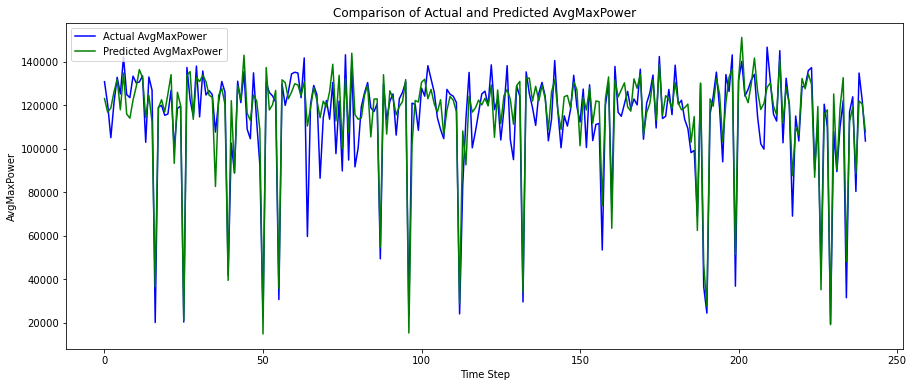

IndexError: index 1 is out of bounds for axis 1 with size 1

<Figure size 1080x432 with 0 Axes>

In [35]:
import matplotlib.pyplot as plt

# We will plot the true values and the predictions to see how they differ.
# Assuming y_test and y_pred are already defined and have the same shapes.

# Convert the scaled values back to the original scale for plotting
y_test_original = scaler_targets.inverse_transform(y_test)
y_pred_original = scaler_targets.inverse_transform(y_pred)

# Plotting the first target (AvgMaxPower)
plt.figure(figsize=(15, 6))
plt.plot(y_test_original[:, 0], label='Actual AvgMaxPower', color='blue')
plt.plot(y_pred_original[:, 0], label='Predicted AvgMaxPower', color='green')
plt.title('Comparison of Actual and Predicted AvgMaxPower')
plt.xlabel('Time Step')
plt.ylabel('AvgMaxPower')
plt.legend()
plt.show()

# Plotting the second target (AvgMinPower)
plt.figure(figsize=(15, 6))
plt.plot(y_test_original[:, 1], label='Actual AvgMinPower', color='blue')
plt.plot(y_pred_original[:, 1], label='Predicted AvgMinPower', color='green')
plt.title('Comparison of Actual and Predicted AvgMinPower')
plt.xlabel('Time Step')
plt.ylabel('AvgMinPower')
plt.legend()
plt.show()

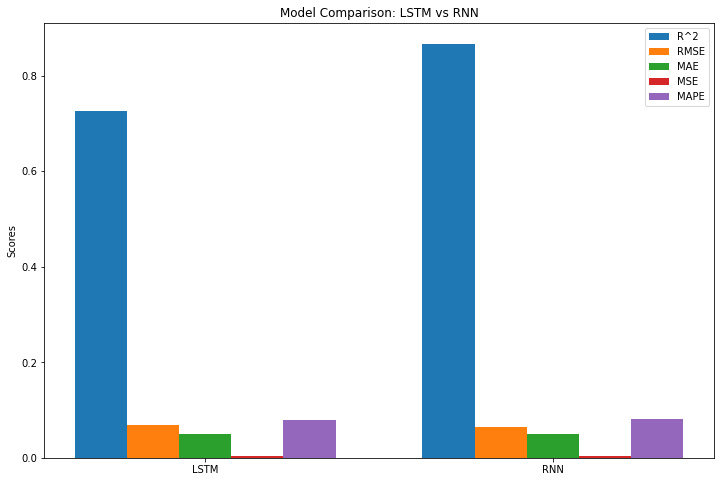

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['LSTM', 'RNN']

# Performance metrics
r2_scores = [0.72649,0.867052 ]
rmse_scores = [0.06871, 0.06507]
mae_scores = [0.04986,0.049748 ]
mse_scores = [0.004722, 0.004234]
mape_scores = [0.0790941, 0.0818397]
# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Bar width
bar_width = 0.15

# Bar positions
bar_positions_r2 = np.arange(len(models))
bar_positions_rmse = bar_positions_r2 +  bar_width
bar_positions_mae = bar_positions_r2 + 2 * bar_width
bar_positions_mse = bar_positions_r2 + 3 * bar_width
bar_positions_mape = bar_positions_r2 + 4 * bar_width
# Bar plots
plt.bar(bar_positions_r2, r2_scores, width=bar_width, label='R^2')
plt.bar(bar_positions_rmse, rmse_scores, width=bar_width, label='RMSE')
plt.bar(bar_positions_mae, mae_scores, width=bar_width, label='MAE')
plt.bar(bar_positions_mse, mse_scores, width=bar_width, label='MSE')
plt.bar(bar_positions_mape, mape_scores, width=bar_width, label='MAPE')
# X-axis ticks and labels
ax.set_xticks(bar_positions_r2 + 2 * bar_width)
ax.set_xticklabels(models)

# Y-axis label
plt.ylabel('Scores')

# Title
plt.title('Model Comparison: LSTM vs RNN')

# Legend
plt.legend()

# Show the plot
plt.show()

In [24]:
future_temp =pd.read_csv(r"C:\Users\86130\01.CDS590\Power Load Data Processing\temp.csv")
future_temp.head()

,Max temperature,Min temperature
0,36,28
1,36,27
2,36,28
3,35,27
4,33,27


In [25]:
# 对未来的温度数据进行与训练数据相同的标准化处理
future_temp_scaled = scaler_features.transform(future_temp)

In [27]:
# 使用最后的 time_steps 天数据来初始化预测
last_steps = features_scaled[-time_steps:]
X_last_steps = last_steps.reshape((1, time_steps, last_steps.shape[1]))

In [28]:
# 预测未来 30 天
future = []
for i in range(30): 
    # 获取下一个时间步的特征（包括温度）
    next_step_features = future_temp_scaled[i].reshape((1, 1, 2))
    
    # 预测下一个时间步
    y_hat = model.predict(X_last_steps)
    future.append(y_hat[0])
    
    # 更新 X_last_steps 以包括预测出的最新目标和下一个时间步的特征
    X_last_steps = np.append(X_last_steps[:, 1:, :], next_step_features, axis=1)
# 反标准化预测结果
future = scaler_targets.inverse_transform(future)

1/1 [==============================] - 0s 26ms/step


In [29]:
print("Future:", future)

Future: [[121029.45069087  92904.6982194 ]
 [125433.67474218  95582.02331914]
 [126240.08810924  95022.86690479]
 [124523.66132461  93312.91606588]
 [125001.63547509  94272.91763043]
 [127936.48438706  94422.96591045]
 [124338.99663474  93911.12690438]
 [127918.78422679  93349.70303816]
 [123932.85301633  94284.61656925]
 [126774.37460395  93798.42202656]
 [125357.1136939   93637.00171031]
 [123908.87750337  96100.56730559]
 [127227.7622892   95774.70108546]
 [124000.24978044  93959.80061057]
 [126533.26665151  95366.17024716]
 [124698.95226096  94204.26113519]
 [122314.22223556  92965.85682164]
 [126470.90587974  93676.25088493]
 [122893.60573625  93938.31546075]
 [121784.07276057  91575.01853486]
 [127000.81970172  95430.06926669]
 [123440.01526972  94334.2014294 ]
 [120537.26753599  90367.40566133]
 [125686.30350899  94871.59447898]
 [124646.0525216   92488.32171939]
 [124358.26781515  93199.19570348]
 [125318.04765969  94987.35276593]
 [127563.78604191  95086.47379863]
 [127408.909

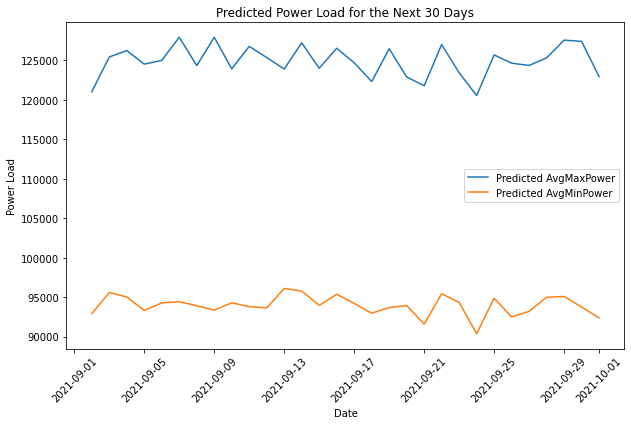

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# 创建日期序列
predicted_dates = pd.date_range(start='2021-09-01', periods=31, closed='right')

# 绘制预测数据
plt.figure(figsize=(10, 6))
plt.plot(predicted_dates, future[:, 0], label='Predicted AvgMaxPower')  # 第一列为 AvgMaxPower
plt.plot(predicted_dates, future[:, 1], label='Predicted AvgMinPower')  # 第二列为 AvgMinPower

# 设置图表标题和标签
plt.title('Predicted Power Load for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Power Load')
plt.legend()
plt.xticks(rotation=45)  # 旋转X轴标签以便清楚地显示日期
plt.show()